## SA1s in South-East Australia touched by the Black Summer bushfires

The datasets used in the following analysys are:

* the Historical Fires Boundaries produced under Stream 1 - Work Package 4 of the 2021-23 Australian Research Data Commons (ARDC) Bushfire Data Challenge Project; a collaborative partnership between the ARDC, Geoscience Australia, and the Emergency Management Spatial Information Network;
* the ABS Census 2021 SA1 community profile data, Indigenous Status by Age by Sex.

The analysis was condicted by counting the population of the SA1s that were even partially overlapping overlapping with burnt areas during the Black Summer period 


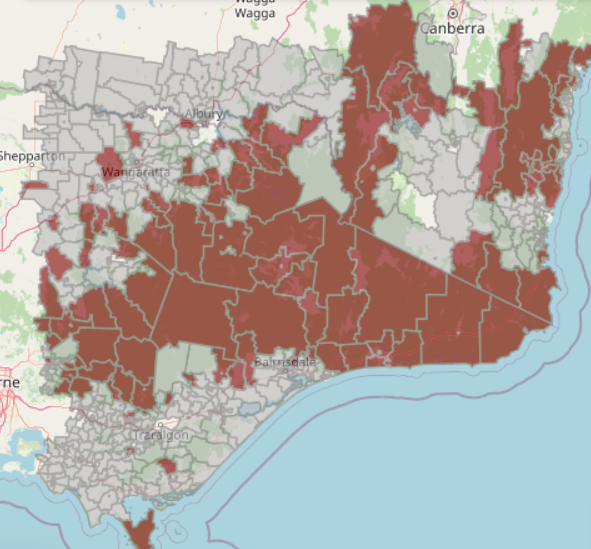


In [11]:
library(pivottabler)
library(IRdisplay)

hf.df <- read.csv('./data/census/census_2021_indigenous_state_sa1.csv')
hf.df$impacted[hf.df$impacted == 0] <- 'Non-impacted'
hf.df$impacted[hf.df$impacted == 1] <- 'Impacted'



In [12]:
pt <- PivotTable$new()
pt$addData(hf.df)
pt$addRowDataGroups("impacted", totalCaption="All")
pt$defineCalculation(calculationName="NI", caption="N.of Ind.", 
                     format=list(digits=1, nsmall=1, big.mark='.', decimal.mark=','),
                     summariseExpression="sum(tot_indig, na.rm=TRUE)")
pt$defineCalculation(calculationName="NNI", caption="N.of non Ind.", 
                     format=list(digits=1, nsmall=1, big.mark='.', decimal.mark=','),
                     summariseExpression="sum(tot_non_indig, na.rm=TRUE)")
pt$defineCalculation(calculationName="T", caption="N.of Pop.", 
                     format=list(digits=1, nsmall=1, big.mark='.', decimal.mark=','),
                     summariseExpression="sum(tot_tot, na.rm=TRUE)")
pt$defineCalculation(calculationName="R", caption="Indigenous %", 
                     type="calculation", basedOn=c("NI", "T"), 
                     format="%.1f %%",
                     calculationExpression="(values$NI / values$T) * 100")
pt$evaluatePivot()
pt$renderPivot()


HTML widgets cannot be represented in plain text (need html)